<h2>1. Contexte<h2/>

<h2>This notebook is dedicated to understanding the subject and exploring the data.<h2/>

<h3>"The dataset includes 174 metrics and 297,099 rows of data of tropical storms in the United States
collected from 1980 onwards. The data is raw, imperfect, and has not been cleaned or preprocessed."<h3/>

<h3>"Information about the dataset attributes can be found in the IBTRACS_variable_documentation file. Using the provided dataset, you are asked to train a model to predict the severity of a tropical cyclone based on geographical input data."<h3/>

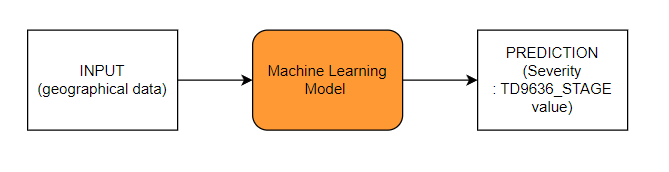

We want to predict the 145th column of the dataset 

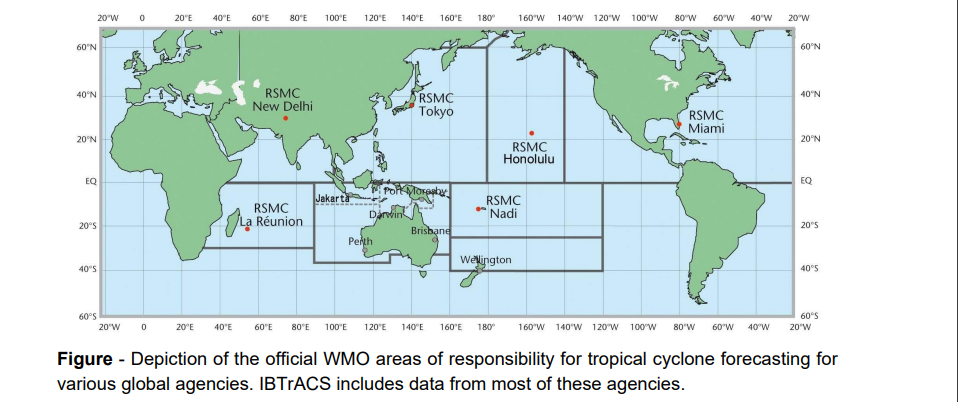

<h2>2. Data Exploration<h2/>

In [51]:
#Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px

In [2]:
#Import and read the csv file, forcing the NaN values in case of formating issues. Display the 5 first rows

df = pd.read_csv("ibtracs.csv",low_memory=False,na_values=["", " ", "-", "NA", "N/A"])
df.head(5)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,NaN,Year,NaN,NaN,NaN,NaN,NaN,NaN,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 00:00:00,TS,-12.5,172.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,350
2,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 03:00:00,TS,-12.2,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,350
3,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 06:00:00,TS,-11.9,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,360
4,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 09:00:00,TS,-11.7,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,10


We notice that the first row, that gives units of certain columns, will be an issue and should not stay in our dataset. We delete this row. 

In [3]:
df=df.drop(index=0)
df.head(5)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
1,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 00:00:00,TS,-12.5,172.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,350
2,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 03:00:00,TS,-12.2,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,350
3,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 06:00:00,TS,-11.9,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,360
4,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 09:00:00,TS,-11.7,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,10
5,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 12:00:00,TS,-11.5,172.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,20


In [22]:
# We highlight the columns that will be challenging, here the ones with NaN
df.isna().sum()

SID                   0
SEASON                0
NUMBER                0
BASIN             40518
SUBBASIN          32646
                  ...  
USA_SEARAD_SE    282038
USA_SEARAD_SW    283730
USA_SEARAD_NW    282124
STORM_SPEED           8
STORM_DIR             8
Length: 174, dtype: int64

In [21]:
# We count the number of NaN per columns to estimate the percentage of the df it represents
missing_values=df.isna().sum()
columns_with_missing = missing_values[missing_values >= 0]

# disable the display limit
pd.set_option("display.max_rows", None)

total_rows = len(df)
missing_percentage = (columns_with_missing / total_rows) * 100

print(missing_percentage.sort_values(ascending=False).to_frame(name="Missing Values Percentage"))

# reinitialize the configuration
pd.reset_option("display.max_rows")


                  Missing Values Percentage
MLC_LAT                          100.000000
TD9635_ROCI                      100.000000
REUNION_GUST                     100.000000
MLC_CLASS                        100.000000
MLC_WIND                         100.000000
MLC_PRES                         100.000000
TD9636_PRES                      100.000000
TD9635_LAT                       100.000000
TD9635_LON                       100.000000
TD9635_WIND                      100.000000
REUNION_R64_NW                   100.000000
REUNION_R64_NE                   100.000000
REUNION_R64_SW                   100.000000
REUNION_R64_SE                   100.000000
MLC_LON                          100.000000
TD9635_PRES                      100.000000
BOM_R64_NW                        99.806125
BOM_R64_SW                        99.800403
BOM_R64_SE                        99.795354
BOM_R64_NE                        99.792324
USA_RECORD                        99.754963
DS824_PRES                      

#### Now, we have a first look at the columns and especially a more detailed vue of the ones with the most of missing values and the one without missing values. As we see by that and by looking directly at the csv file,a lot of columns have a high percentage of missing values:  **151/174 columns have more than 50% of missing values, and 16/174 columns have no values at all**
#### We first decide to delete the columns that don't contain values, since they don't add anything.

In [19]:
empty_columns=missing_percentage[missing_percentage==100]
df_processed=df.drop(columns=empty_columns.index)
df_processed.shape

(297098, 158)

#### Another important point to notice is that the target metric itself, TD9636_STAGE has 83,7% of missing values, so we can't just delete all the columns with "too many" missing values, we need to further our investigation.
#### And it means that there are 48343 rows with available value of TD9636_STAGE

In [26]:
df_processed.loc[df_processed.TD9636_STAGE.notna(),:]

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST,BOM_GUST_PER,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
1,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 00:00:00,TS,-12.5,172.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,350
2,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 03:00:00,TS,-12.2,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,350
3,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 06:00:00,TS,-11.9,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,360
4,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 09:00:00,TS,-11.7,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,10
5,1980001S13173,1980,1.0,SP,MM,PENI,1980-01-01 12:00:00,TS,-11.5,172.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67406,1989354N05155,1989,129.0,WP,MM,JACK,1989-12-29 00:00:00,TS,14.6,141.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,250
67407,1989354N05155,1989,129.0,WP,MM,JACK,1989-12-29 03:00:00,TS,14.4,141.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,250
67408,1989354N05155,1989,129.0,WP,MM,JACK,1989-12-29 06:00:00,TS,14.3,140.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,250
67409,1989354N05155,1989,129.0,WP,MM,JACK,1989-12-29 09:00:00,TS,14.1,140.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,250


### **Data Handling Options for TD9636_STAGE**

From now on, we have two main options:  

#### **Option 1: Keep only the rows where `TD9636_STAGE` is not missing**  
#### 📌 Advantages:  
- Ensures the model is trained only with complete data.  
- No need to handle missing target values.  
- Easier.  

#### 📌 Disadvantages:  
- We lose **83%** of the available data, which may limit model performance.  
- Risk of bias if the remaining data is not representative of the entire dataset.  


#### **Option 2: Attempt to impute `TD9636_STAGE` to retain more data**  
We could try predicting the missing values of `TD9636_STAGE` using other variables like latitude, longitude, pressure, wind, etc., before training the actual model.  

#### 📌 Advantages:  
- Uses more data, potentially improving model robustness.  
- Useful if the remaining data is biased (e.g., certain regions or years are overrepresented).  

#### 📌 Disadvantages:  
- Introduces uncertainty by predicting a variable that will later be used as the target.  
- If the imputation is poorly done, it may degrade the performance of the main model.  


---

## So let's analyse the remaining 48343 rows:
- If the remaining **48,343 rows** are sufficient and well-distributed, it's better to **drop rows with missing `TD9636_STAGE`** and train the model directly.  
- If analysis shows that the remaining data is too biased, then **smart imputation** should be considered. 


### Checking the temporal distribution:

In [46]:
df.SEASON.unique()

array(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024', '2025'], dtype=object)

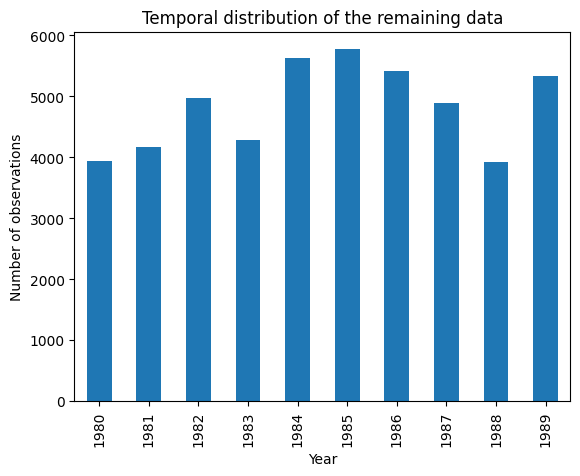

In [45]:
# filter rows where TD9636_STAGE not missing
df_remaining=df_processed.loc[df_processed.TD9636_STAGE.notna(),:]


# Visualization

df_remaining['SEASON'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of observations")
plt.title("Temporal distribution of the remaining data")
plt.show()

### We immediatly see that there are no datas after 1989, which means that we can't keep only these 48343 remaining rows, it would be **biased**.
By doing some research on the IBTRACS datas, we found that "The TD9636 dataset was constructed in the 1960s and 1970s by NOAA/National Climatic Center (now called NCEI). It represents a global collection of storms derived from multiple sources. It has not been updated since the 1980s.Data from TC 9636 is used in IBTrACS outside of the North Atlantic and before 1980."
**Whiwh explains this lack of data after 1989.**

*Source :* [IBTrACS version4r01 Technical Details.pdf](https://www.ncei.noaa.gov/sites/g/files/anmtlf171/files/2024-06/IBTrACS%20version4r01%20Technical%20Details.pdf)

In [27]:
df.value_counts("BASIN")

BASIN
WP    99760
SI    62929
EP    47854
SP    31050
NI    14868
SA      119
Name: count, dtype: int64

In [28]:
df.value_counts("SUBBASIN")

SUBBASIN
MM    197661
WA     24732
EA     10730
BB      9688
CP      8589
AS      5180
CS      4193
GM      3679
Name: count, dtype: int64

<h4>Un premier problème se pose : les colonnes "BASIN" et "SUBBASIN" possèdent des données manquantes (BASIN 40518 & SUBBASIN 32646). De plus elles possèdent des valeurs dites MM (missing). Il faut déterminer leur pertinence dans ce dataset, pour savoir s'il faut les conserver ou non pour l'entrainement du modèle.<h4/>

In [29]:
#Mapping des colonnes pour les encoder numériquement

basin_mapping = {val: idx for idx, val in enumerate(df['BASIN'].unique())}
subbasin_mapping = {val: idx for idx, val in enumerate(df['SUBBASIN'].unique())}

df['BASIN_encoded'] = df['BASIN'].map(basin_mapping)
df['SUBBASIN_encoded'] = df['SUBBASIN'].map(subbasin_mapping)


In [30]:
print(df[['BASIN', 'BASIN_encoded']].drop_duplicates())

       BASIN  BASIN_encoded
1         SP              0
42        SI              1
1492      WP              2
1810      EP              3
2746     NaN              4
4983      NI              5
169717    SA              6


In [31]:
print(df[['SUBBASIN', 'SUBBASIN_encoded']].drop_duplicates())

     SUBBASIN  SUBBASIN_encoded
1          MM                 0
55         EA                 1
143        WA                 2
1810       CP                 3
2746      NaN                 4
2761       GM                 5
3215       CS                 6
4983       BB                 7
5045       AS                 8


In [32]:
# Convertir les colonnes en type numérique (forcer les erreurs à NaN si des chaînes sont présentes)

df['BASIN_encoded'] = pd.to_numeric(df['BASIN_encoded'], errors='coerce')
df['SUBBASIN_encoded'] = pd.to_numeric(df['SUBBASIN_encoded'], errors='coerce')
df['TD9636_STAGE'] = pd.to_numeric(df['TD9636_STAGE'], errors='coerce')


In [33]:
# Vérifier les valeurs manquantes
print(df[['BASIN_encoded', 'SUBBASIN_encoded', 'TD9636_STAGE']].isna().sum())

# Supprimer les lignes contenant des NaN dans ces colonnes
df_cleaned = df.dropna(subset=['BASIN_encoded', 'SUBBASIN_encoded', 'TD9636_STAGE'])


BASIN_encoded            0
SUBBASIN_encoded         0
TD9636_STAGE        248755
dtype: int64


In [34]:
# Calculer la corrélation après nettoyage
correlation_basin = df_cleaned['BASIN_encoded'].corr(df_cleaned['TD9636_STAGE'])
correlation_subbasin = df_cleaned['SUBBASIN_encoded'].corr(df_cleaned['TD9636_STAGE'])

print(f"Corrélation entre BASIN_encoded et TD9636_STAGE : {correlation_basin}")
print(f"Corrélation entre SUBBASIN_encoded et TD9636_STAGE : {correlation_subbasin}")


Corrélation entre BASIN_encoded et TD9636_STAGE : 0.00230569887445233
Corrélation entre SUBBASIN_encoded et TD9636_STAGE : -0.044855441114447614


<h3>Analyse de ces deux colonnes : on peut voir une corrélation de 0.002 et -0.004, cela signifie BASIN et SUBBASIN ont un très faible impact sur la valeur de TD9636_STAGE. Nous pouvons prendre la décision de les supprimer.<h3/>

In [35]:
df.drop(columns=['BASIN', 'SUBBASIN'], inplace=True)

In [36]:
#Identification des colonnes qui possèdent la même valeur à chaque ligne, qui sont donc inutiles

columns_with_constant_values = df.nunique() == 1
constant_columns = df.columns[columns_with_constant_values]
print("Colonnes avec des valeurs constantes :")
print(constant_columns)


Colonnes avec des valeurs constantes :
Index(['DS824_STAGE', 'USA_SEAHGT'], dtype='object')


In [37]:
#Suppression de cette colonne 

df.drop(columns=['MLC_CLASS'], inplace=True)

<h3>On va maintenant encoder nos colonnes et les normaliser pour continuer notre étude. <h3/>

In [38]:
# Identifier les colonnes de type objet (string)
string_columns = df.select_dtypes(include=['object']).columns
print("Colonnes à encoder :", string_columns)

Colonnes à encoder : Index(['SID', 'SEASON', 'NAME', 'ISO_TIME', 'NATURE', 'LAT', 'LON', 'WMO_WIND',
       'WMO_PRES', 'WMO_AGENCY',
       ...
       'BOM_GUST_PER', 'REUNION_GUST', 'REUNION_GUST_PER', 'USA_SEAHGT',
       'USA_SEARAD_NE', 'USA_SEARAD_SE', 'USA_SEARAD_SW', 'USA_SEARAD_NW',
       'STORM_SPEED', 'STORM_DIR'],
      dtype='object', length=151)
